1. Import packages

In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

2.Load Natural Gas Data

In [18]:
data=yf.download("NG=F",start="2020-01-01")['Close']
returns=np.log(data/data.shift(1)).dropna()

mu=returns.mean()
sigma=returns.std()

/tmp/ipython-input-360486370.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download("NG=F",start="2020-01-01")['Close']
[*********************100%***********************]  1 of 1 completed


Monte carlo simulation (10,000 Path)

In [19]:
T=252
N=252
simulations=10000
dt=T/N

price_path=np.zeros((simulations,N))
S0=data.iloc[-1].item()
mu=mu.item()
sigma=sigma.item()

for sim in range (simulations):
  prices=[S0]
  for t in range (1,N):
    shock=np.random.normal(0,1)
    price=prices[-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*shock*np.sqrt(dt)*shock)
    prices.append(price)
  price_path[sim,:]=prices

Risk Matrix

In [20]:
final_price=price_path[:,-1]

var_95=np.percentile(final_price,5)
cvar_95=final_price[final_price<=var_95].mean()

strategy backtest example (moving average cross)

In [21]:
df=pd.DataFrame(price_path.T,columns=range(simulations))

strategy_return=[]
for i in range (1000):
  sim_price=df[i]
  ma_fast=sim_price.rolling(window=5).mean()
  ma_slow=sim_price.rolling(window=20).mean()

  signal=(ma_fast>ma_slow).astype(int)
  sim_ret=signal.shift(1)*(sim_price.pct_change())
  strategy_return.append(sim_ret.sum())

Share Ratio

In [22]:
Sharpe=np.mean(strategy_return)/np.std(strategy_return)
Sharpe

np.float64(9.949847373738924)

### Strategy Return Distribution

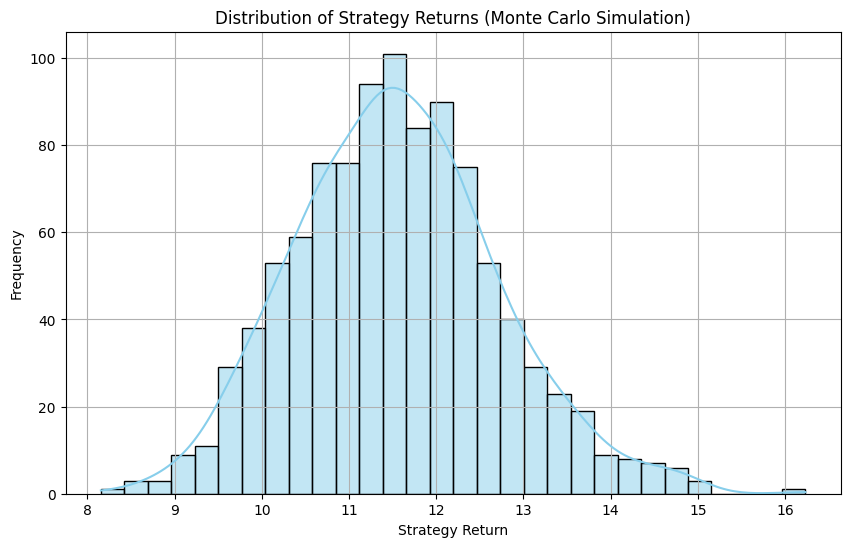

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(strategy_return, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Strategy Returns (Monte Carlo Simulation)')
plt.xlabel('Strategy Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()